# Practice Exam

### Imporing the relevant libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import  make_blobs

### Tony's shop

In [58]:
inputs_train , target_train = make_blobs(
    n_samples=50*4,   
    n_features=2,   # Number of features
    cluster_std=2,   # Standard deviation of clusters
    centers=[(-1,1),(-2,5),(4,0),(3,6)]
    , random_state=365
)
inputs_test , target_test = make_blobs(
    n_samples=40*4,   
    n_features=2,   # Number of features
    cluster_std=2,   # |Standard deviation of clusters
    centers=[(-1,1),(-2,5),(4,0),(3,6)]
    , random_state=365
)



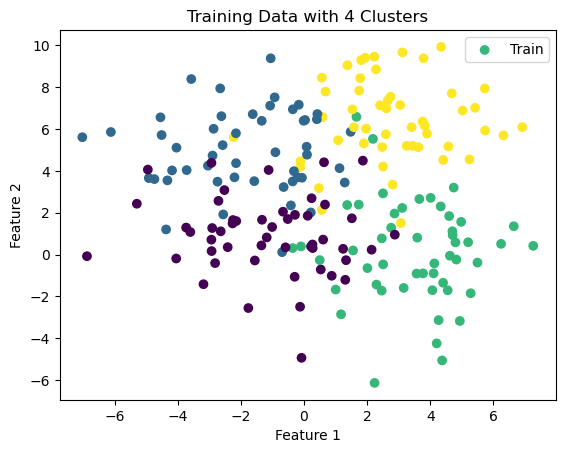

In [60]:
plt.scatter(inputs_train[:, 0], inputs_train[:, 1], c=target_train, cmap='viridis', marker='o', label='Train')
plt.title('Training Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

### Olive's shop

In [66]:
from sklearn.neighbors import KNeighborsClassifier 
clf_3_u=KNeighborsClassifier(n_neighbors=3 , weights="uniform") 
clf_3_u.fit(inputs_train, target_train)
clf_3_u.predict([[2,4]])

array([0])

In [68]:
from sklearn.neighbors import KNeighborsClassifier 
clf_3_u=KNeighborsClassifier(n_neighbors=5 , weights="uniform") 
clf_3_u.fit(inputs_train, target_train)
clf_3_u.predict([[2,4]])

array([1])

In [72]:
param={
    "n_neighbors":range(1,21),
    "weights":["uniform","distance"],
    
}

In [74]:
from sklearn.model_selection import GridSearchCV
grid_search =GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid = param, 
                           scoring = 'accuracy')

In [80]:
grid_search.fit(inputs_train, target_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [84]:
grid_search.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': range(1, 21),
  'weights': ['uniform', 'distance']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [88]:
grid_search.best_score_

0.8399999999999999

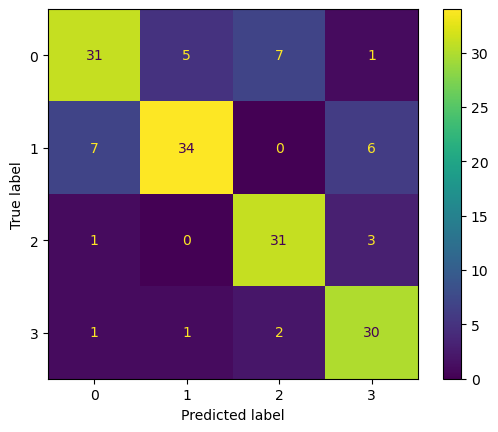

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
y_pred = grid_search.predict(inputs_test)
ConfusionMatrixDisplay.from_predictions(y_pred,target_test)

In [92]:
print(classification_report(y_pred,target_test))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        44
           1       0.85      0.72      0.78        47
           2       0.78      0.89      0.83        35
           3       0.75      0.88      0.81        34

    accuracy                           0.79       160
   macro avg       0.79      0.80      0.79       160
weighted avg       0.79      0.79      0.79       160

